# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

total_data = pd.read_csv('/workspace/KMEANS/data/raw/total_data.csv')
total_data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [3]:
from sklearn.model_selection import train_test_split

X = total_data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 6, random_state = 42)
kmean.fit(X_train)
cluster_train = kmean.predict(X_train)

In [5]:
X_train['Cluster'] = cluster_train
X_train.head()

,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


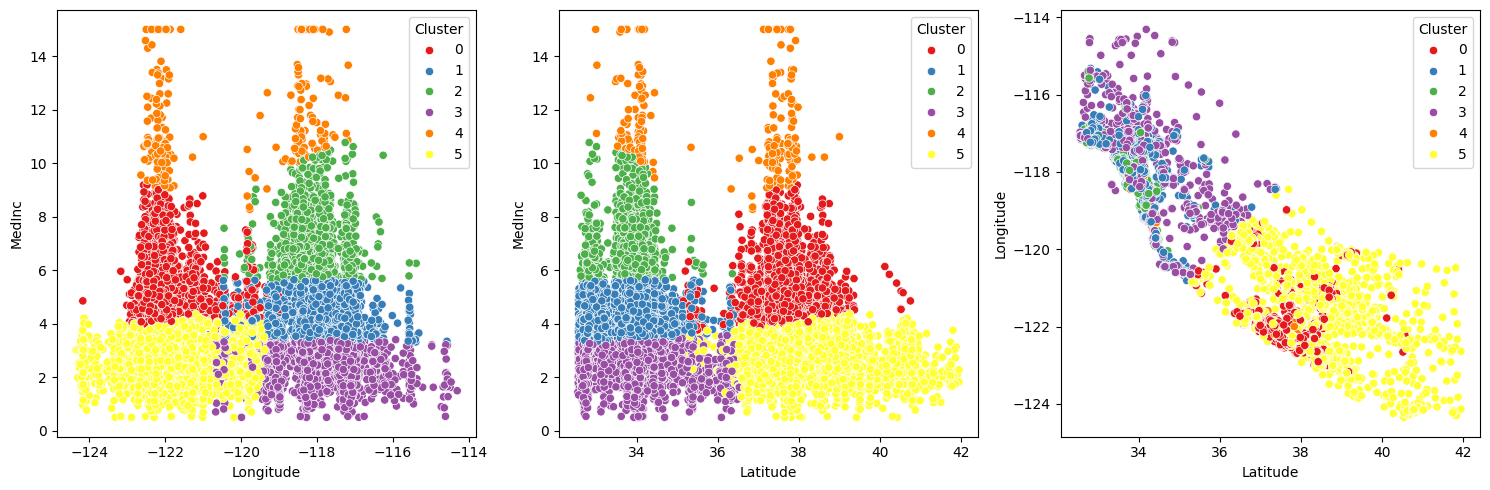

In [6]:
fig, axis = plt.subplots(figsize = (15,5), ncols = 3)

sns.scatterplot(ax = axis[0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.tight_layout()
plt.show()

In [7]:
cluster_test = kmean.predict(X_test)
X_test['Cluster'] = cluster_test

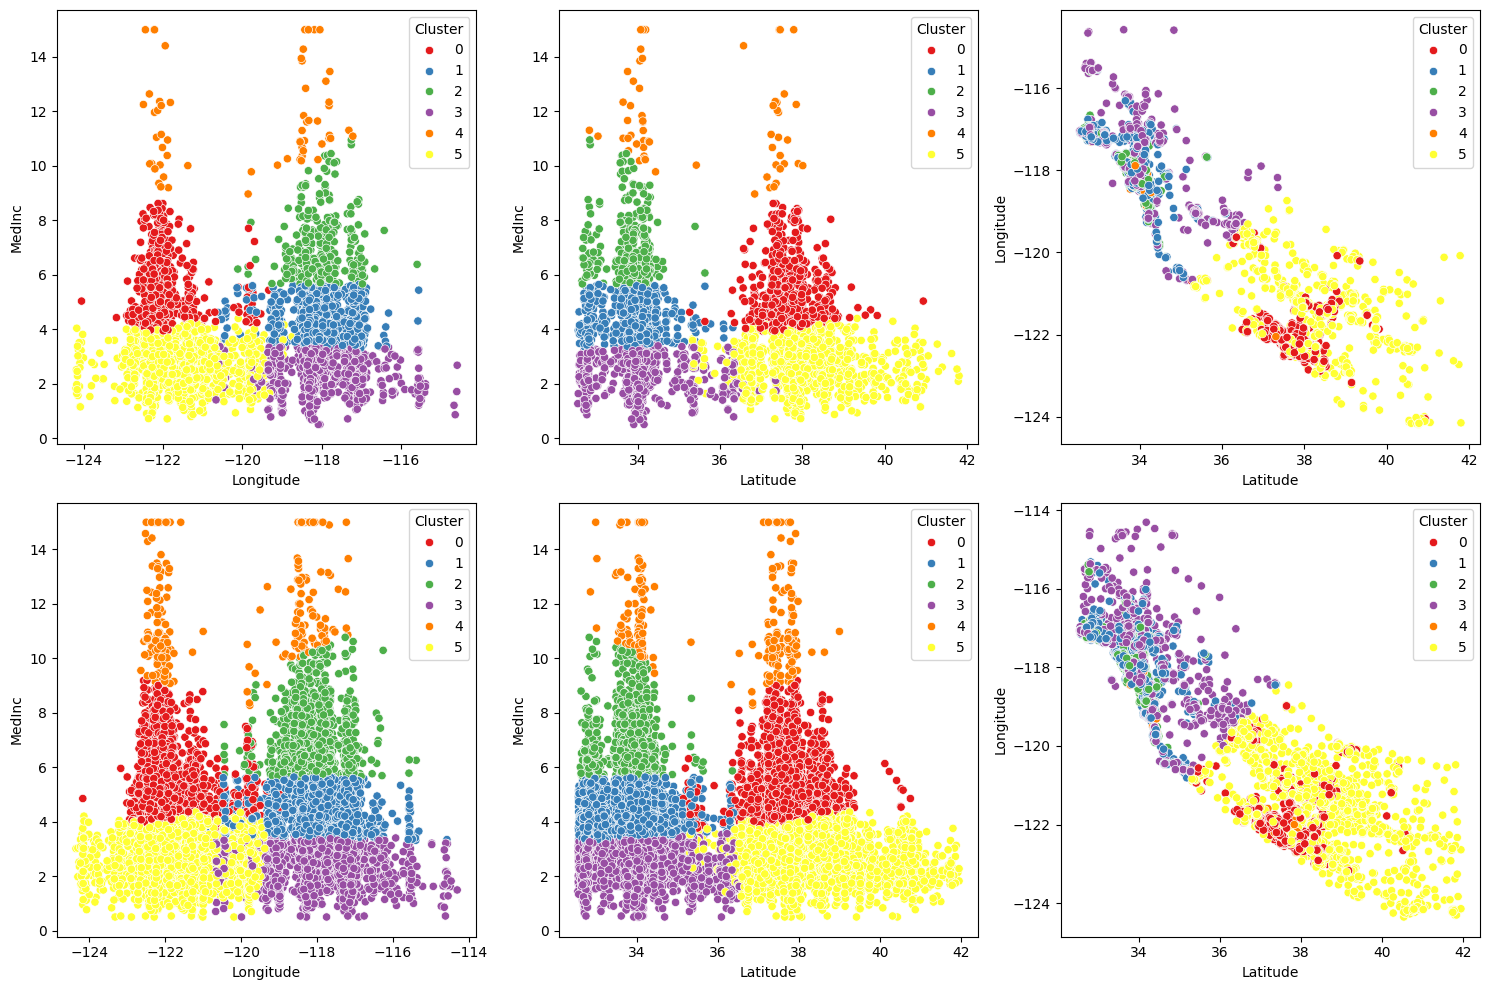

In [8]:
fig, axis = plt.subplots(2,3, figsize = (15,10))

sns.scatterplot(ax = axis[0,0], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,2], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.tight_layout()
plt.show()

MODELO KNN

In [9]:
y_train = X_train["Cluster"]
X_train = X_train.drop("Cluster", axis = 1)

y_test = X_test["Cluster"]
X_test = X_test.drop("Cluster", axis = 1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred_train = model.predict(X_train)
y_pred_train

array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [12]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [13]:
from sklearn.metrics import accuracy_score

print("Accuracy test:", accuracy_score(y_test, y_pred))
print("Accuracy train:", accuracy_score(y_train, y_pred_train))

Accuracy test: 0.9920058139534884
Accuracy train: 0.9944888565891473


In [14]:
from pickle import dump

dump(model, open("//workspace/KMEANS/models/knn_classifier_default.sav", "wb"))
dump(kmean, open("//workspace/KMEANS/models/k-mean.sav", "wb"))

REGRESIÓN LÓGISTICA

In [15]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred_LR = model_LR.predict(X_test)
y_pred_LR


array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_LR)

0.9670542635658915

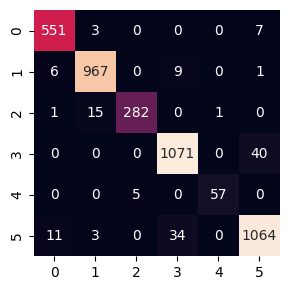

In [18]:
from sklearn.metrics import confusion_matrix

california_cm = confusion_matrix(y_test, y_pred_LR)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

NAIVES BAYES

In [19]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred_NB = model.predict(X_test)
y_pred_NB

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_NB)

0.9920058139534884

Después de realizar los tres modelos podemos observar que el mejor modelo es el de KNN